<a href="https://colab.research.google.com/github/kretchmar/CS339_2023/blob/main/Classification_2D_LinearSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear SVM Example

Matt Kretchmar <p>
January 2023 <p>

In this notebook we load a simple 2D dataset that represents samples in two classes.  We attempt to perform a linear separator classification algorithm using Linear SVM to compute the optimal decision boundary.




In [ ]:
# Import Statements
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd


## Read 2D Data

Read the 2D dataset, print it, plot it


In [ ]:
# You will need to obtain the data2D.csv file and then put it in your google drive.
# Be sure to change the path after "My Drive" to your own file structure in your own google drive.

from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/My Drive/cs339/Notebooks/data2D.csv',sep='\t',index_col=0)

# disconnect the drive
drive.flush_and_unmount()




Mounted at /content/gdrive


           x1         x2  Class
0    5.163721   9.511413      0
1    7.638432   8.317251      0
2   11.663044   8.299338      0
3    7.870167   8.810545      0
4    4.774249  10.921027      0
..        ...        ...    ...
95  11.156722   8.764939      1
96  11.806759   9.939947      1
97  10.479419  10.904993      1
98  10.398550   9.800563      1
99  11.962008  11.199231      1

[250 rows x 3 columns]


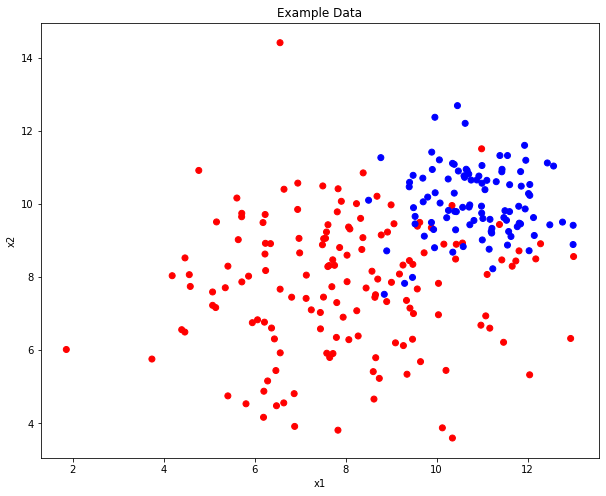

In [ ]:
# Let's print and plot the data so we can visualize it.
print(data)
colors = { 0:'red', 1:'blue'}
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(data.x1,data.x2,c=data.Class.map(colors))
plt.title('Example Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Testing and Training Sets
Divide Data into test set and training set.


In [ ]:
def buildTrainTestSet ( df, percent=0.2 ):
  '''
  The function takes a dataset and helps break it into a testing set
  and a training set.  
  PARAMETERS:
  df - a pandas dataframe with one column named "Class" which
  is the target output category.  
  The columns are attributes and the rows are samples.  

  percent - a percentage between 0 and 1 which indicates how
  much of the data should be used for the test set.  The
  remaining data is used for the training set.

  RETURN VALUE: dfTrain, dfTest
  The function returns two pandas dataframes which the same
  structure as the input dataframe.  The input dataframe is
  partitioned into a test set comprising "percent"% of the
  rows randomly selected from the original dataframe. The training
  set is the remaining 1-percent % of the data rows.  
  Note that the input dataframe is first sorted by the "label" 
  columns and the percentage is taken from each category (each
  unique label value).  That way the testing and training set
  each have approximately the same percentage of samples with
  each label value.  
  '''
  # initialize dfTest and dfTrain to None 
  dfTest = None
  dfTrain = None

  # find unique labels and sort dataset by labels
  vals = df.Class.unique()
  df2 = df.sort_values(by=['Class'])

  # for each label, we will select percent of the rows for testing, 
  # keep the rest for training
  for val in vals:
    # get subset of rows with this label val
    df3 = df2.loc[df2['Class'] == val]
    count = len(df3)
    # random permutation of all these row indices
    shuffle = np.random.permutation(count)
    # select set of indices for test set rows 
    # and training set rows
    testIndices = shuffle[:int(count*percent)]
    trainIndices = shuffle[int(count*percent):]

    testSetTemp = df3.iloc[testIndices]
    trainSetTemp = df3.iloc[trainIndices]

    # append and build test and training sets
    if dfTest is None:
      dfTest = testSetTemp
      dfTrain = trainSetTemp
    else:
      dfTest = dfTest.append(testSetTemp)
      dfTrain = dfTrain.append(trainSetTemp)

  return dfTrain,dfTest



In [ ]:

trainSet,testSet = buildTrainTestSet(data,0.3)
print('Training Set\n',len(trainSet))
print(trainSet)
print('Testing Set \n',len(testSet))
print(testSet)

Training Set
 175
            x1         x2  Class
110   7.699364   7.738431      0
77    6.950462  10.573719      0
145   8.608773   5.413615      0
144  12.046990   5.326372      0
118   9.351223   5.342205      0
..         ...        ...    ...
38   10.574800   9.911362      1
32   10.988448   9.943336      1
95   11.156722   8.764939      1
25    9.970119  10.309825      1
16   11.862023  10.490483      1

[175 rows x 3 columns]
Testing Set 
 75
            x1         x2  Class
75    8.072623   6.288415      0
30    8.581264   8.162057      0
114  12.948000   6.321386      0
39    7.519161   9.052429      0
147   8.095330   9.318475      0
..         ...        ...    ...
31   10.998844  10.571153      1
36   10.732362   9.433840      1
67    9.472146   7.992859      1
80   12.436272  11.125878      1
93    9.956790   8.805456      1

[75 rows x 3 columns]


## Linear Separator

Our first approach to solve this problem is to fine a linear decision boundary.  This is a fancy way of saying that we want to draw a straight line between the two classes.   

The classic perceptron is exactly this kind of machine learning algorithm.  It will iteratively find a decision surface between the two classes by making small corrections to an existing decision boundary every time the line misclassifies an example.  

Instead, here we implement a batch processing application in which the decision boundary is computed optimally as the one that creates the largest margin between the classes.  In this particular dataset it is not possible to draw a single line that complete separates categories, so we will have to implement a soft-margin classifier that allows for a few mistakes and tries to do the best separating line otherwise.  

The Support Vector Machine has this kind of optimization built in.  It has a more sophisticated ability to first map the data into a higher dimensional space where linear separability may be more achievable.  We will not use this added feature here.   

In [ ]:
# We use the SVM package from sklearn toolkit
from sklearn import svm

X = trainSet.iloc[:,:2].to_numpy()
y = trainSet.iloc[:,2].to_numpy()

C = 1.0 # regularization parameter
# create the SVM class
clf = svm.SVC(kernel='linear',gamma=0.7,C=C)
# fit the SVM to the data (training phase)
clf.fit(X,y)


SVC(gamma=0.7, kernel='linear')

### Analyze Results

Let us plot the decision boundary and also compute the classification rate

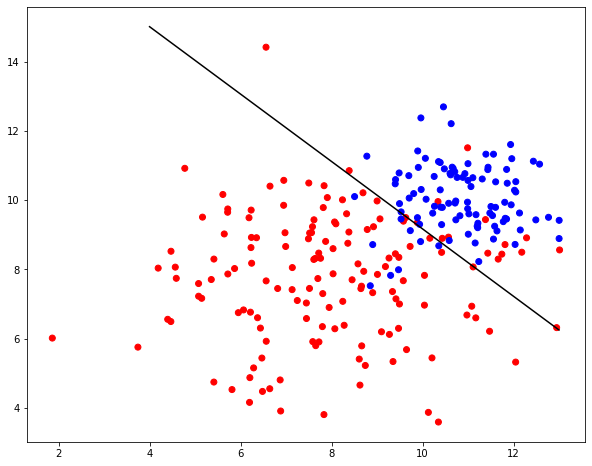

In [ ]:
colors = { 0:'red', 1:'blue'}
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(data.x1,data.x2,c=data.Class.map(colors))

# get model parameters,  w is the vector perpendicular to the separation line
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4,13,100)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx,yy,'k-')

plt.show()


In [ ]:
# Extract x test values and y labels from test set
Xtest = testSet.iloc[:,:2].to_numpy()
ytest = testSet.iloc[:,2].to_numpy().astype(int)

# Use model to predict category
z = clf.predict(Xtest).astype(int)

# Compare ytest and z to count errors
d = len(ytest)
count_incorrect = np.sum(z != ytest)
accuracy = (d-count_incorrect) / d

# Report results
print("Num Test Samples: {0:d}".format(d))
print("Num Errors:       {0:d}".format(count_incorrect))
print("Accuracy:         {0:4.2f}".format(accuracy))



Num Test Samples: 75
Num Errors:       9
Accuracy:         0.88
